In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
%matplotlib inline

In [26]:
url = 'https://raw.githubusercontent.com/Abhay1706/Data/refs/heads/main/Salary_Data.csv'
data = pd.read_csv(url)
df = data.copy()   #Creating copy of actual data

# Basic Information Check

In [28]:
print("📋 DataFrame Info:")
print(df.info())
print("\n📊 Statistical Summary:")
print(df.describe())

📋 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None

📊 Statistical Summary:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [32]:
print("\n❓ Missing Values Count:")
print(df.isnull().sum()) 


❓ Missing Values Count:
YearsExperience    0
Salary             0
dtype: int64


In [34]:
Shape = df.shape
print(f"\n🔢 Shape of the DataFrame: {Shape} (rows, columns)") ### to check how many rows and columns we have


🔢 Shape of the DataFrame: (30, 2) (rows, columns)


# Exploratory Data Analysis(EDA)

In [37]:
print("📈 Correlation between 'Delivery Time' and 'Sorting Time':")
print(df[['YearsExperience','Salary']].corr())

📈 Correlation between 'Delivery Time' and 'Sorting Time':
                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


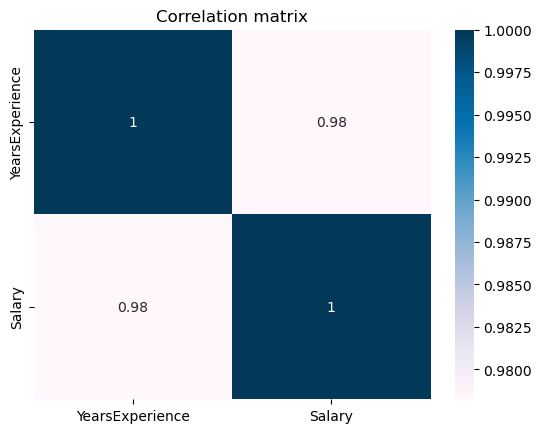

In [51]:
sns.heatmap(df[['YearsExperience','Salary']].corr(),annot = True, cmap= "PuBu",cbar = True)
plt.title('Correlation matrix')
plt.savefig('Correlation between Salary and YearsExperience.png',dpi = 100)
plt.show()

In [53]:
#There is a strong positive correlation (0.9782) between Years of Experience and Salary, indicating that salary increases with experience.

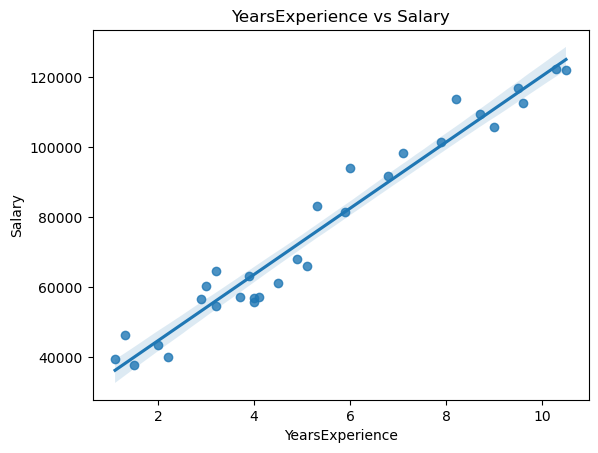

In [55]:
sns.regplot(x = 'YearsExperience',y = 'Salary', data = df)
plt.title('YearsExperience vs Salary')
plt.savefig('YearsExperience_vs_Salary.png',dpi=100)
plt.show()

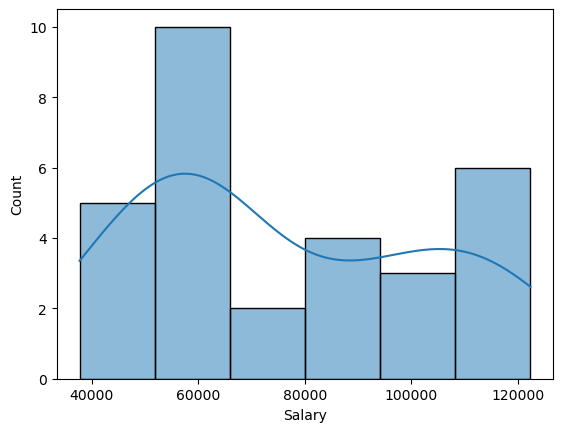

In [61]:
sns.histplot(x='Salary', data = df, kde = True)
plt.show()

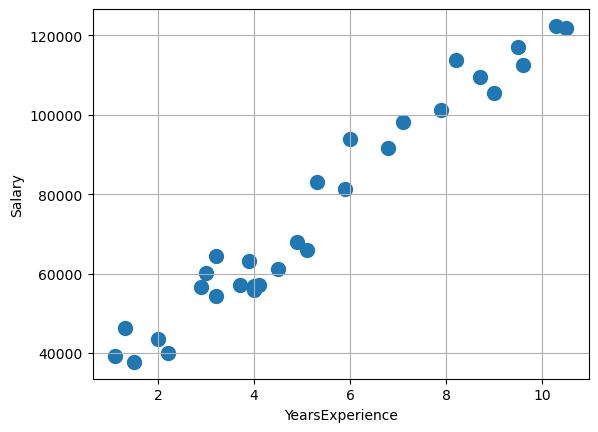

In [66]:
df.plot(x='YearsExperience',y='Salary', kind='scatter',s= 100,grid=True)
plt.savefig('Salary_scatter.png',dpi=100)
plt.show()

# Simple Linear Regrression

## Objective - To predict Salary based on the Years of Experience

In [79]:
# Here we have X as YearsExperience or Independent Variable
# and y as Salary or Dependent Variable or Target Variable 

In [81]:
x = df[['YearsExperience']]
print(x.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2


In [83]:
y = df[['Salary']]
print(y.head())

    Salary
0  39343.0
1  46205.0
2  37731.0
3  43525.0
4  39891.0


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [87]:
print(x_train.head())

    YearsExperience
5               2.9
28             10.3
20              6.8
19              6.0
25              9.0


In [89]:
print(y_train.head())

      Salary
5    56642.0
28  122391.0
20   91738.0
19   93940.0
25  105582.0


In [91]:
model = LinearRegression()

In [99]:
%%time
model_training = model.fit(x_train, y_train)
print('Training Completed')

Training Completed
CPU times: total: 0 ns
Wall time: 0 ns


In [145]:
#r2_score for model training
model_score = model_training.score(x_train,y_train)
print("📊 R-squared on Model2 Training:",round(model_score,4))

📊 R-squared on Model2 Training: 0.9572


In [143]:
y_pred = model_training.predict(x_test)
print("Predicted values (y_pred):",y_pred)

Predicted values (y_pred): [[71878.46363776]
 [81339.12323186]
 [55795.3423278 ]
 [53903.21040898]
 [75662.7274754 ]
 [39712.22101784]]


In [141]:
print("Actual values (y_test):",y_test)

Actual values (y_test):      Salary
15  67938.0
18  81363.0
7   54445.0
6   60150.0
17  83088.0
2   37731.0


In [133]:
r2_scores = r2_score(y_test,y_pred)
print(f"R² Score for Model 2: {round(r2_scores,4)}")

R² Score for Model 2: 0.9219


In [129]:
slope = model_training.coef_
intercept = model_training.intercept_

print("📈 Slope (coefficients):", slope)
print("📉 Constant (intercept):", intercept)

📈 Slope (coefficients): [[9460.6595941]]
📉 Constant (intercept): [25521.23162669]


In [137]:
from math import sqrt
rmse = sqrt(mean_absolute_error(y_pred, y_test))
print("📉 Root Mean Squared Error (RMSE):", round(rmse,4))

📉 Root Mean Squared Error (RMSE): 59.1157


# Saving the model

In [148]:
import joblib

In [150]:
joblib.dump(model_training,'Salary_model.pkl')

['Salary_model.pkl']